# Task 1

Extract a subset of traning samples from the MNIST handwriten signatures. Create a small convolution neural network with two convolution layers, two pool layers, flatten, dense layer and softmax layer to classify the images. Find out classification error for learning set and testing set.



In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Extract a subset of training samples (for example, first 1000 samples)
train_images = train_images[:1000]
train_labels = train_labels[:1000]

# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Define the model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate the model on the training set
train_loss, train_acc = model.evaluate(train_images, train_labels)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'Training accuracy: {train_acc*100:.2f}%')
print(f'Testing accuracy: {test_acc*100:.2f}%')


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/20
13/13 [==============================] - 5s 148ms/step - loss: 2.1080 - accuracy: 0.3638 - val_loss: 1.7415 - val_accuracy: 0.6850
Epoch 2/20
13/13 [==============================] - 2s 186ms/step - loss: 1.2412 - accuracy: 0.7312 - val_loss: 0.8453 - val_accuracy: 0.7600
Epoch 3/20
13/13 [==============================] - 3s 194ms/step - loss: 0.5545 - accuracy: 0.8425 - val_loss: 0.6130 - val_accuracy: 0.8150
Epoch 4/20
13/13 [==============================] - 2s 143ms/step - loss: 0.3571 - accuracy: 0.8838 - val_loss: 0.4267 - val_accuracy: 0.8800
Epoch 5/20
13/13 [==============================] - 2s 119ms/step - loss: 0.2746 - accuracy: 0.9200 - val_loss: 0.4160 - val_accuracy: 0.8950
Epoch 6/20
13/13 [==============================] - 1s 107ms/step - loss: 0.2074 - accuracy: 0.9513 - val_loss: 0.3551 - val_accuracy: 0.8950
Epoch 7/20
13/13 [==============================] - 1s 112ms/step - loss: 0.1581 - 

In [ ]:
# Calculate classification error for learning set
train_error = 1 - train_acc

# Calculate classification error for testing set
test_error = 1 - test_acc

print(f'Classification error for learning set: {train_error*100:.2f}%')
print(f'Classification error for testing set: {test_error*100:.2f}%')


Classification error for learning set: 1.70%
Classification error for testing set: 6.59%


In [ ]:
from tensorflow.keras.utils import plot_model

# Assuming 'model' is the name of your Sequential model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


# Task 2

Create an autoencoder for MNIST fashion dataset. The input and the output is the same image of a number 28x28 pixels.



4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/50
235/235 [==============================] - 11s 30ms/step - loss: 0.3797 - val_loss: 0.3198
Epoch 2/50
235/235 [==============================] - 6s 24ms/step - loss: 0.3106 - val_loss: 0.3070
Epoch 3/50
235/235 [==============================] - 4s 18ms/step - loss: 0.3019 - val_loss: 0.3012
Epoch 4/50
235/235 [==============================] - 5s 21ms/step - loss: 0.2971 - val_loss: 0.2974
Epoch 5/50
235/235 [==============================] - 5s 23ms/step - loss: 0.2941 - val_loss: 0.2949
Epoch 6/50
235/235 [==============================] - 4s 18ms/step - loss: 0.2918 - val_loss: 0.2932
Epoch 7/50
235/235 [==============================] - 5s 21ms/step - loss: 0.2899 - val_loss: 0.2915
Epoch 8/50
235/235 [==============================] - 5s 23ms/step - loss: 0.2886 - val_loss: 0.2900
Epoch 9/50
235/235 [==============================] - 4s 18ms/step - loss: 0.2873 - val_loss: 0.2889
Epoch 10/50
235/235 [======

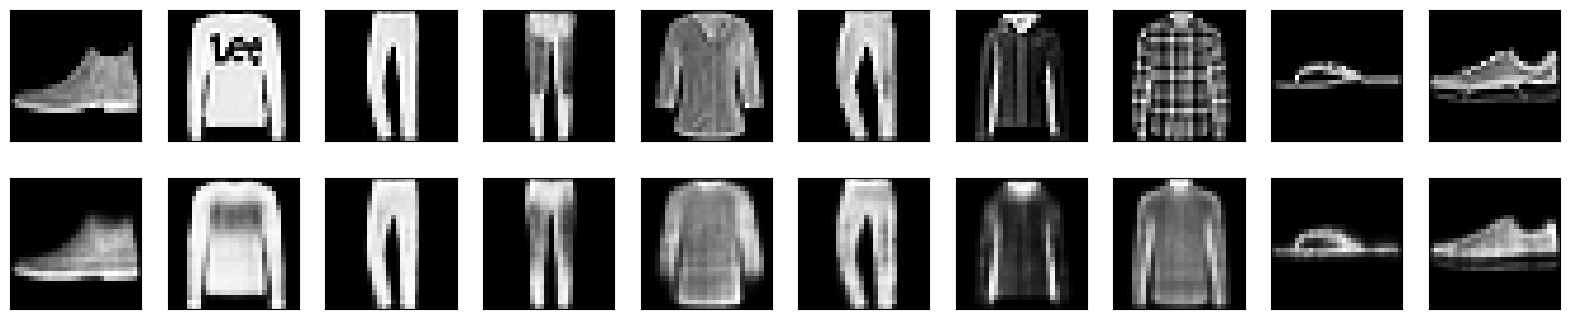

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode some images
encoded_imgs = autoencoder.predict(x_test)

# Plot original and reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
import random as rnd

t_x = []
t_y = []
sz = len(train_images)
for i in range(20):
   idx = rnd.randint(0,sz-1)
   for c in range(10):
     while c not in train_labels[idx]:
       idx = rnd.randint(0,sz-1)
     t_x += [np.ndarray.flatten(train_images[idx])]
     t_y += [train_labels[idx]]

t_x = np.array(t_x, dtype=np.float32)/255.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import random as rnd

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Create a random subset of the dataset
t_x = []
t_y = []
sz = len(train_images)
for i in range(20):
    idx = rnd.randint(0, sz - 1)
    for c in range(10):
        while train_labels[idx] != c:
            idx = rnd.randint(0, sz - 1)
        t_x.append(np.ndarray.flatten(train_images[idx]))
        t_y.append(train_labels[idx])

t_x = np.array(t_x, dtype=np.float32) / 255.0

# Flatten the images
t_x = t_x.reshape((len(t_x), np.prod(t_x.shape[1:])))

# autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# autoencoder model
autoencoder = Model(input_img, decoded)

# Compile
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train
autoencoder.fit(t_x, t_x, epochs=50, batch_size=4, shuffle=True)

# Encode and decode the subset images
decoded_imgs = autoencoder.predict(t_x)

# Plot original and reconstructed images
n = len(t_x)
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(t_x[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import random as rnd

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Create a random subset of the dataset
t_x = []
t_y = []
sz = len(train_images)
for i in range(20):
    idx = rnd.randint(0, sz - 1)
    for c in range(10):
        while train_labels[idx] != c:
            idx = rnd.randint(0, sz - 1)
        t_x.append(np.ndarray.flatten(train_images[idx]))
        t_y.append(train_labels[idx])

t_x = np.array(t_x, dtype=np.float32) / 255.0


t_x = t_x.reshape((len(t_x), np.prod(t_x.shape[1:])))

# autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# autoencoder model
autoencoder = Model(input_img, decoded)

# Compile
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train
autoencoder.fit(t_x, t_x, epochs=50, batch_size=4, shuffle=True)

# Encode and decode the subset images
decoded_imgs = autoencoder.predict(t_x)

# Separate visualizations for original, reconstructed, and encoded images
n = len(t_x)
plt.figure(figsize=(20, 6))

# Plot original images
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(t_x[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.title('Original Images')

# Plot reconstructed images
for i in range(n):
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.title('Reconstructed Images')

# Plot encoded representations
encoder_model = Model(inputs=input_img, outputs=encoded)
encoded_imgs = encoder_model.predict(t_x)

for i in range(n):
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(encoded_imgs[i].reshape(8, 4))  # 32-dimensional encoded representation
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.title('Encoded Representations')
plt.show()



## Subtask 1

 Use two dense layers (hidden and output). Hidden layer with 2 neurons, output layer with 784 neurons. Plot the response of hidden neurons in scatter plot, number categories distinquish by colors.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import random as rnd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Load the MNIST Fashion dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Create a random subset of the dataset
t_x = []
t_y = []
sz = len(train_images)
for i in range(20):
    idx = rnd.randint(0, sz - 1)
    for c in range(10):
        while train_labels[idx] != c:
            idx = rnd.randint(0, sz - 1)
        t_x.append(np.ndarray.flatten(train_images[idx]))
        t_y.append(train_labels[idx])

t_x = np.array(t_x, dtype=np.float32) / 255.0

# Flatten the images
t_x = t_x.reshape((len(t_x), np.prod(t_x.shape[1:])))

# Define the autoencoder architecture with 2 neurons in the hidden layer
input_img = Input(shape=(784,))
encoded = Dense(2, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(t_x, t_x, epochs=50, batch_size=4, shuffle=True)

# Extract the responses of the hidden layer
encoder_model = Model(inputs=input_img, outputs=encoded)
encoded_imgs = encoder_model.predict(t_x)

# Plot the response of hidden neurons in a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=t_y, cmap='tab10')
plt.colorbar(scatter, label='Number Category')
plt.title('Hidden Neuron Responses')
plt.xlabel('Hidden Neuron 1')
plt.ylabel('Hidden Neuron 2')
plt.show()



## Subtask 2

Modify Subtask 1 so that you add three hidden layers and 2 latent features, i.e.
784-10-2-10-784 neurons. Observe differences.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import random as rnd
from sklearn.preprocessing import StandardScaler

# Load the MNIST Fashion dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Create a random subset of the dataset
t_x = []
t_y = []
sz = len(train_images)
for i in range(20):
    idx = rnd.randint(0, sz - 1)
    for c in range(10):
        while train_labels[idx] != c:
            idx = rnd.randint(0, sz - 1)
        t_x.append(np.ndarray.flatten(train_images[idx]))
        t_y.append(train_labels[idx])

t_x = np.array(t_x, dtype=np.float32) / 255.0

# Flatten the images
t_x = t_x.reshape((len(t_x), np.prod(t_x.shape[1:])))

# Define the autoencoder architecture with three hidden layers and 2 latent features
input_img = Input(shape=(784,))
hidden1 = Dense(10, activation='relu')(input_img)
hidden2 = Dense(2, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
decoded = Dense(784, activation='sigmoid')(hidden3)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(t_x, t_x, epochs=50, batch_size=4, shuffle=True)

# Extract the responses of the hidden layer
encoder_model = Model(inputs=input_img, outputs=hidden2)
encoded_imgs = encoder_model.predict(t_x)

# Plot the response of hidden neurons in a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=t_y, cmap='tab10')
plt.colorbar(scatter, label='Number Category')
plt.title('Hidden Neuron Responses with 3 Hidden Layers')
plt.xlabel('Hidden Neuron 1')
plt.ylabel('Hidden Neuron 2')
plt.show()


## Subtask 3

Modify Subtask 1 so that you add convolution layers, pooling layers, ... for the autoencoder and observe differences.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Reshape, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import random as rnd
from sklearn.preprocessing import StandardScaler

# Load the MNIST Fashion dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Create a random subset of the dataset
t_x = []
t_y = []
sz = len(train_images)
for i in range(20):
    idx = rnd.randint(0, sz - 1)
    for c in range(10):
        while train_labels[idx] != c:
            idx = rnd.randint(0, sz - 1)
        t_x.append(train_images[idx])
        t_y.append(train_labels[idx])

t_x = np.array(t_x, dtype=np.float32) / 255.0

# Add channel dimension to the images for convolutional layers
t_x = np.expand_dims(t_x, axis=-1)

# Define the convolutional autoencoder architecture
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(2, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Reshape to (28, 28) for visualization
decoded_reshaped = Reshape((28, 28))(decoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded_reshaped)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(t_x, t_x, epochs=50, batch_size=4, shuffle=True)

# Extract the responses of the encoded layer
encoder_model = Model(inputs=input_img, outputs=encoded)
encoded_imgs = encoder_model.predict(t_x)

# Reshape the encoded data for scatter plot
encoded_imgs_reshaped = encoded_imgs.reshape((len(encoded_imgs), -1))

# Plot the response of hidden neurons in a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(encoded_imgs_reshaped[:, 0], encoded_imgs_reshaped[:, 1], c=t_y, cmap='tab10')
plt.colorbar(scatter, label='Number Category')
plt.title('Encoded Layer Responses with Convolutional Autoencoder')
plt.xlabel('Hidden Neuron 1')
plt.ylabel('Hidden Neuron 2')
plt.show()



## Subtask 4

Extract the decoder from the autoencoder of subtask 1-3 and generate new images based on randomly generated latent features. Plot generated images.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Reshape, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import random as rnd
from sklearn.preprocessing import StandardScaler

# Load the MNIST Fashion dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Create a random subset of the dataset
t_x = []
t_y = []
sz = len(train_images)
for i in range(20):
    idx = rnd.randint(0, sz - 1)
    for c in range(10):
        while train_labels[idx] != c:
            idx = rnd.randint(0, sz - 1)
        t_x.append(train_images[idx])
        t_y.append(train_labels[idx])

t_x = np.array(t_x, dtype=np.float32) / 255.0

# Add channel dimension to the images for convolutional layers
t_x = np.expand_dims(t_x, axis=-1)

# Define the convolutional autoencoder architecture
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(2, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Reshape to (28, 28) for visualization
decoded_reshaped = Reshape((28, 28))(decoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded_reshaped)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(t_x, t_x, epochs=50, batch_size=4, shuffle=True)

# Extract the decoder part from the autoencoder
decoder_input = Input(shape=(7, 7, 2))  # Adjust the shape based on the output shape of the encoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(decoder_input)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Reshape to (28, 28) for visualization
decoded_reshaped = Reshape((28, 28))(decoded)

# Create the decoder model
decoder = Model(decoder_input, decoded_reshaped)

# Generate new images based on randomly generated latent features
num_generated_images = 10
random_latent_features = np.random.rand(num_generated_images, 7, 7, 2)  # Adjust the shape based on the output shape of the encoder
generated_images = decoder.predict(random_latent_features)

# Reshape the generated images
generated_images_reshaped = generated_images.reshape((num_generated_images, 28, 28))

# Plot the generated images
plt.figure(figsize=(15, 3))
for i in range(num_generated_images):
    plt.subplot(1, num_generated_images, i + 1)
    plt.imshow(generated_images_reshaped[i], cmap='gray')
    plt.axis('off')

plt.suptitle('Generated Images from Random Latent Features')
plt.show()
